In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ds = pd.read_csv('organics.csv')

In [3]:
ds.head()

,Customer Loyalty ID,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Television Region,Affluence Grade,Age,Frequency,Frequency Percent,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
0,140,U,Midlands,Gold,16.0,C,Wales & West,10,76,1,0.00%,4,0,0,16000.00
1,620,U,Midlands,Gold,35.0,D,Wales & West,4,49,1,0.00%,5,0,0,6000.00
2,868,F,Midlands,Silver,27.0,D,Wales & West,5,70,1,0.00%,8,1,1,0.02
3,1120,M,Midlands,Tin,51.0,F,Midlands,10,65,1,0.00%,7,1,1,0.01
4,2313,F,Midlands,Tin,4.0,A,Midlands,11,68,1,0.00%,8,0,0,0.01


In [4]:
ds.shape

(22223, 15)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 15 columns):
Customer Loyalty ID             22223 non-null int64
Gender                          19711 non-null object
Geographic Region               21758 non-null object
Loyalty Status                  22223 non-null object
Neigborhood Cluster-55 Level    21549 non-null float64
Neighborhood Cluster-7 Level    21549 non-null object
Television Region               21758 non-null object
Affluence Grade                 22223 non-null object
Age                             22223 non-null object
Frequency                       22223 non-null int64
Frequency Percent               22223 non-null object
Loyalty Card Tenure             22223 non-null object
Organics Purchase Count         22223 non-null int64
Organics Purchase Indicator     22223 non-null int64
Total Spend                     22223 non-null float64
dtypes: float64(2), int64(4), object(9)
memory usage: 2.5+ MB


In [6]:
ds['Customer Loyalty ID'].nunique()

22223

In [7]:
ds.drop(columns='Customer Loyalty ID', inplace=True)

In [8]:
ds.shape

(22223, 14)

#### The 'Customer Loyalty ID' column has only unique values that identify the customers and it's not relevant for the analysis, so I've dropped it.

In [9]:
ds['Gender'].value_counts()

F    12149
M     5815
U     1747
Name: Gender, dtype: int64

In [10]:
ds[(ds['Gender'] == 'F') | (ds['Gender'] == 'M')].shape[0] / ds.shape[0] * 100

80.83517076902308

In [11]:
ds = ds[(ds['Gender'] == 'F') | (ds['Gender'] == 'M')]

In [12]:
ds.shape

(17964, 14)

In [13]:
le = preprocessing.LabelEncoder()
ds['Gender'] = le.fit_transform(ds['Gender'])

In [14]:
ds['Gender'].value_counts()

0    12149
1     5815
Name: Gender, dtype: int64

#### The 'Gender' column has about 20% of non-useful data (unknow and null), but as this column is important for the analysis I've kept only the useful rows. Then I've converted the categorical data into numeric.

In [15]:
ds.isna().sum()

Gender                            0
Geographic Region               379
Loyalty Status                    0
Neigborhood Cluster-55 Level    564
Neighborhood Cluster-7 Level    564
Television Region               379
Affluence Grade                   0
Age                               0
Frequency                         0
Frequency Percent                 0
Loyalty Card Tenure               0
Organics Purchase Count           0
Organics Purchase Indicator       0
Total Spend                       0
dtype: int64

In [16]:
ds['Geographic Region'].value_counts()

South East    6976
Midlands      5426
North         3517
Scottish      1107
South West     559
Name: Geographic Region, dtype: int64

In [17]:
ds[ds['Geographic Region'].isna()].shape[0] / ds.shape[0] * 100

2.1097751057670897

In [18]:
ds = ds[ds['Geographic Region'].notna()]

In [19]:
ds.shape

(17585, 14)

In [20]:
ds['Television Region'].value_counts()

London          4976
Midlands        2527
S & S East      2000
N West          1701
Wales & West    1370
East            1311
Yorkshire       1186
C Scotland       675
N East           630
S West           559
N Scot           270
Ulster           218
Border           162
Name: Television Region, dtype: int64

In [21]:
pd.crosstab(ds['Geographic Region'], ds['Television Region'])

Television Region,Border,C Scotland,East,London,Midlands,N East,N Scot,N West,S & S East,S West,Ulster,Wales & West,Yorkshire
Geographic Region,,,,,,,,,,,,,
Midlands,0,0,1311,0,2527,0,0,0,0,0,218,1370,0
North,0,0,0,0,0,630,0,1701,0,0,0,0,1186
Scottish,162,675,0,0,0,0,270,0,0,0,0,0,0
South East,0,0,0,4976,0,0,0,0,2000,0,0,0,0
South West,0,0,0,0,0,0,0,0,0,559,0,0,0


In [22]:
ds.drop(columns='Television Region', inplace=True)

In [23]:
ds.shape

(17585, 13)

In [24]:
le = preprocessing.LabelEncoder()
ds['Geographic Region'] = le.fit_transform(ds['Geographic Region'])

In [25]:
ds['Geographic Region'].value_counts()

3    6976
0    5426
1    3517
2    1107
4     559
Name: Geographic Region, dtype: int64

#### On the 'Geographic Region' column I've removed the nulls (about 2% of the data). Then I've checked the relation with the column 'Television Region' and conclude that the Tv is a sub-group of Geo, there is no new info only more granularity on the regions. So for the purpose of this analysis I've decided to drop the Tv column. Finally on the 'Geographic Region' I've converted the categorical data into numeric.

In [26]:
ds.isna().sum()

Gender                            0
Geographic Region                 0
Loyalty Status                    0
Neigborhood Cluster-55 Level    553
Neighborhood Cluster-7 Level    553
Affluence Grade                   0
Age                               0
Frequency                         0
Frequency Percent                 0
Loyalty Card Tenure               0
Organics Purchase Count           0
Organics Purchase Indicator       0
Total Spend                       0
dtype: int64

In [27]:
ds['Loyalty Status'].value_counts()

Silver      6754
Tin         5243
Gold        4929
Platinum     659
Name: Loyalty Status, dtype: int64

In [28]:
le = preprocessing.LabelEncoder()
ds['Loyalty Status'] = le.fit_transform(ds['Loyalty Status'])

In [29]:
ds['Loyalty Status'].value_counts()

2    6754
3    5243
0    4929
1     659
Name: Loyalty Status, dtype: int64

#### On the 'Loyalty Status' column I've converted the categorical data into numeric.

In [30]:
ds['Neigborhood Cluster-55 Level'].describe()

count    17032.000000
mean        27.311179
std         15.727897
min          1.000000
25%         14.000000
50%         27.000000
75%         39.000000
max         55.000000
Name: Neigborhood Cluster-55 Level, dtype: float64

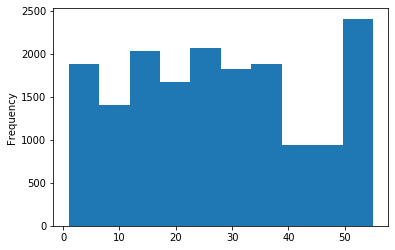

In [31]:
ds['Neigborhood Cluster-55 Level'].plot.hist()
plt.show()

In [32]:
ds[ds['Neigborhood Cluster-55 Level'].isna()].shape[0] / ds.shape[0] * 100

3.144725618424794

In [33]:
ds.dropna(inplace=True)

In [34]:
ds.shape

(17032, 13)

#### On the 'Neigborhood Cluster-55 Level' column I've removed the nulls (about 3% of the data).

In [35]:
ds.isna().sum()

Gender                          0
Geographic Region               0
Loyalty Status                  0
Neigborhood Cluster-55 Level    0
Neighborhood Cluster-7 Level    0
Affluence Grade                 0
Age                             0
Frequency                       0
Frequency Percent               0
Loyalty Card Tenure             0
Organics Purchase Count         0
Organics Purchase Indicator     0
Total Spend                     0
dtype: int64

In [36]:
ds['Neighborhood Cluster-7 Level'].value_counts()

C    3611
D    3462
B    3267
F    3155
E    2069
A    1422
U      46
Name: Neighborhood Cluster-7 Level, dtype: int64

In [37]:
ds[ds['Neighborhood Cluster-7 Level'] == 'U'].shape[0] / ds.shape[0] * 100

0.27007984969469234

In [38]:
ds = ds[ds['Neighborhood Cluster-7 Level'] != 'U']

In [39]:
ds.shape

(16986, 13)

In [40]:
le = preprocessing.LabelEncoder()
ds['Neighborhood Cluster-7 Level'] = le.fit_transform(ds['Neighborhood Cluster-7 Level'])

In [41]:
ds['Neighborhood Cluster-7 Level'].value_counts()

2    3611
3    3462
1    3267
5    3155
4    2069
0    1422
Name: Neighborhood Cluster-7 Level, dtype: int64

#### On the 'Neighborhood Cluster-7 Level' I've removed the unknows (about 0.3% of the data) and converted the categorical data into numeric.

In [42]:
ds['Affluence Grade'].value_counts()

9     1981
8     1960
7     1919
6     1711
10    1679
11    1295
5     1214
12     990
.      840
4      703
13     692
14     482
3      390
15     334
16     204
2      145
17     123
18      76
19      58
20      50
21      30
1       28
22      20
24      14
23      13
25      12
27       5
26       5
0        4
29       3
31       2
30       2
28       1
34       1
Name: Affluence Grade, dtype: int64

In [43]:
ds[ds['Affluence Grade'] == '.'].shape[0] / ds.shape[0] * 100

4.945249028611798

In [44]:
ds = ds[ds['Affluence Grade'] != '.']

In [45]:
ds.shape

(16146, 13)

In [46]:
ds['Affluence Grade'] = ds['Affluence Grade'].astype('int')

In [47]:
ds.dtypes

Gender                            int32
Geographic Region                 int32
Loyalty Status                    int32
Neigborhood Cluster-55 Level    float64
Neighborhood Cluster-7 Level      int32
Affluence Grade                   int32
Age                              object
Frequency                         int64
Frequency Percent                object
Loyalty Card Tenure              object
Organics Purchase Count           int64
Organics Purchase Indicator       int64
Total Spend                     float64
dtype: object

In [48]:
ds['Affluence Grade'].describe()

count    16146.000000
mean         8.832714
std          3.477158
min          0.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         34.000000
Name: Affluence Grade, dtype: float64

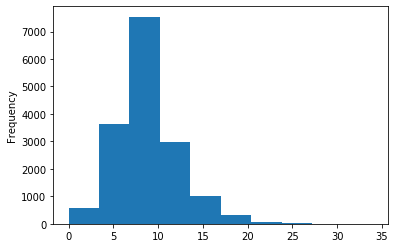

In [49]:
ds['Affluence Grade'].plot.hist()
plt.show()

In [50]:
ds = ds[(ds['Affluence Grade'] != 0) & (ds['Affluence Grade'] != 34)]

In [51]:
ds.shape

(16141, 13)

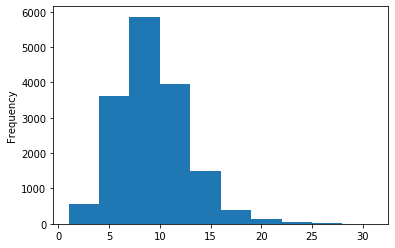

In [52]:
ds['Affluence Grade'].plot.hist()
plt.show()

#### On the 'Affluence Grade' column I've remove the rows with '.' (about 5% of the data), then change the type to integer. Finally removed the rows with '0' and '34' as the the scale in from 1 to 30, so these are probably outliers.

In [53]:
ds['Age'].value_counts()

.     1071
51     459
50     415
47     386
53     385
      ... 
23      15
20       8
21       6
18       4
19       4
Name: Age, Length: 63, dtype: int64

In [54]:
ds[ds['Age'] == '.'].shape[0] / ds.shape[0] * 100

6.6352766247444395

In [55]:
ds = ds[ds['Age'] != '.']

In [56]:
ds.shape

(15070, 13)

In [57]:
ds['Age'] = ds['Age'].astype('int')

In [58]:
ds.dtypes

Gender                            int32
Geographic Region                 int32
Loyalty Status                    int32
Neigborhood Cluster-55 Level    float64
Neighborhood Cluster-7 Level      int32
Affluence Grade                   int32
Age                               int32
Frequency                         int64
Frequency Percent                object
Loyalty Card Tenure              object
Organics Purchase Count           int64
Organics Purchase Indicator       int64
Total Spend                     float64
dtype: object

In [59]:
ds['Age'].describe()

count    15070.000000
mean        53.508427
std         13.305206
min         18.000000
25%         43.000000
50%         53.000000
75%         64.000000
max         79.000000
Name: Age, dtype: float64

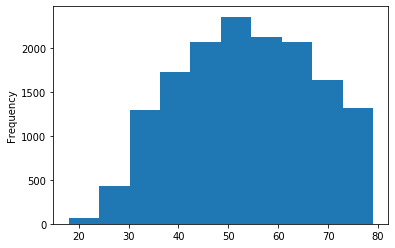

In [60]:
ds['Age'].plot.hist()
plt.show()

#### On the 'Age' column I've remove the rows with '.' (about 6% of the data) and then change the type to integer.

In [61]:
ds['Frequency'].value_counts()

1    15070
Name: Frequency, dtype: int64

In [62]:
ds['Frequency Percent'].value_counts()

0.00%    15070
Name: Frequency Percent, dtype: int64

In [63]:
ds.drop(columns=['Frequency', 'Frequency Percent'], inplace=True)

In [64]:
ds.shape

(15070, 11)

#### I've dropped the columns 'Frequency' and 'Frequency Percent' as they are meaningless. 

In [65]:
ds['Loyalty Card Tenure'].value_counts()

5     2982
8     2198
4     1834
1     1128
9     1104
2     1042
7      946
6      804
3      733
11     456
10     385
12     277
.      175
13     134
16      96
14      94
15      84
18      68
17      60
21      56
19      50
27      36
0       36
26      30
20      30
31      28
24      28
29      28
25      26
30      25
23      25
32      23
22      21
28      18
35       4
33       3
38       1
34       1
36       1
Name: Loyalty Card Tenure, dtype: int64

In [66]:
ds[ds['Loyalty Card Tenure'] == '.'].shape[0] / ds.shape[0] * 100

1.1612475116124752

In [67]:
ds = ds[ds['Loyalty Card Tenure'] != '.']

In [68]:
ds.shape

(14895, 11)

In [69]:
ds['Loyalty Card Tenure'] = ds['Loyalty Card Tenure'].astype('int')

In [70]:
ds.dtypes

Gender                            int32
Geographic Region                 int32
Loyalty Status                    int32
Neigborhood Cluster-55 Level    float64
Neighborhood Cluster-7 Level      int32
Affluence Grade                   int32
Age                               int32
Loyalty Card Tenure               int32
Organics Purchase Count           int64
Organics Purchase Indicator       int64
Total Spend                     float64
dtype: object

#### On the 'Loyalty Card Tenure' column I've remove the rows with '.' (about 1% of the data) and then change the type to integer.

In [71]:
ds['Organics Purchase Count'].describe()

count    14895.000000
mean         0.336623
std          0.588266
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: Organics Purchase Count, dtype: float64

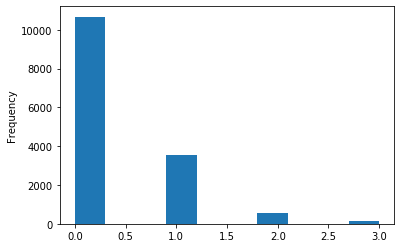

In [72]:
ds['Organics Purchase Count'].plot.hist()
plt.show()

#### On the column 'Organics Purchase Count' no cleaning needed. This column might work as target for classification model, I'll see later.

In [73]:
ds['Organics Purchase Indicator'].value_counts(normalize=True)

0    0.716348
1    0.283652
Name: Organics Purchase Indicator, dtype: float64

#### On the column 'Organics Purchase Indicator' no cleaning needed. This column is the main target for classification model that I will try.

In [74]:
ds['Total Spend'].describe()

count     14895.000000
mean       4429.429847
std        7573.182699
min           0.010000
25%           0.010000
50%        2000.000000
75%        6000.000000
max      296313.850000
Name: Total Spend, dtype: float64

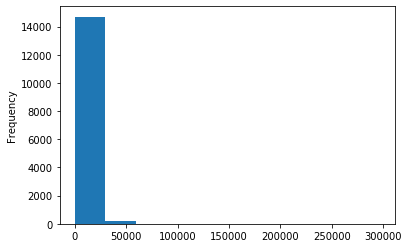

In [75]:
ds['Total Spend'].plot.hist()
plt.show()

In [76]:
total_spend = ds['Total Spend']

In [77]:
total_spend = total_spend.sort_values()

In [93]:
len(total_spend)

14895

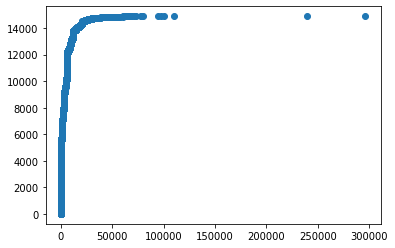

In [94]:
plt.scatter(total_spend, range(14895))
plt.show()

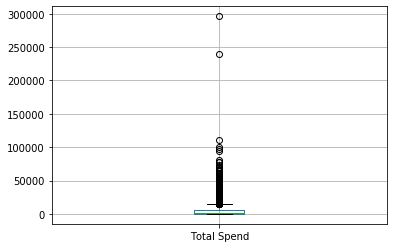

In [97]:
ds.boxplot(['Total Spend'])
plt.show()

In [106]:
ds['Total Spend'].quantile(0.75) + 1.5 * (ds['Total Spend'].quantile(0.75) - ds['Total Spend'].quantile(0.25))

14999.985

In [110]:
ds[ds['Total Spend'] > 14999.985].shape

(987, 11)

In [109]:
987 / ds.shape[0] * 100

6.62638469284995

In [152]:
ds[ds['Total Spend'] > 81000].shape

(6, 11)

#### Regarding the 'Total Spend' columns, although there are many outliers (about 7%) I will not remove them by now, because they make sense in this context.

In [153]:
ds.head()

,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Affluence Grade,Age,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
2,0,0,2,27.0,3,5,70,8,1,1,0.02
3,1,0,3,51.0,5,10,65,7,1,1,0.01
4,0,0,3,4.0,0,11,68,8,0,0,0.01
6,0,0,3,3.0,0,11,74,8,0,0,0.01
7,1,1,3,32.0,3,13,62,5,0,0,0.01


In [154]:
ds.reset_index(drop=True, inplace=True)

In [155]:
ds.head()

,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Affluence Grade,Age,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
0,0,0,2,27.0,3,5,70,8,1,1,0.02
1,1,0,3,51.0,5,10,65,7,1,1,0.01
2,0,0,3,4.0,0,11,68,8,0,0,0.01
3,0,0,3,3.0,0,11,74,8,0,0,0.01
4,1,1,3,32.0,3,13,62,5,0,0,0.01


In [159]:
ds.dtypes

Gender                            int32
Geographic Region                 int32
Loyalty Status                    int32
Neigborhood Cluster-55 Level    float64
Neighborhood Cluster-7 Level      int32
Affluence Grade                   int32
Age                               int32
Loyalty Card Tenure               int32
Organics Purchase Count           int64
Organics Purchase Indicator       int64
Total Spend                     float64
dtype: object

In [156]:
ds.shape

(14895, 11)

In [157]:
(22223 - 14895) / 22223 * 100

32.974845880394184

#### I have removed about 33% of the data but I still have  14895 entries.

In [161]:
ds.to_csv('organics_clean.csv')